In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
import matplotlib.colors as mcolors
import pandas as pd
from matplotlib.ticker import MaxNLocator

In [211]:
saveState = False
# regMethodDir = "gradient"
# regMethod = ""
# 
# if regMethodDir == "gradient":
#     regMethod = "Gradientní sestup"
# elif regMethodDir == "gradientline":
#     regMethod = "Gradientní sestup se zl. řezem"
# elif regMethodDir == "gradientlbf":
#     regMethod = "BFGS s omezenou pamětí"
    
view = "ap"
colors = list(mcolors.TABLEAU_COLORS.values())
patNumbers = ["01", "02", "03", "04", "05", "06", "07", "08", "09", "10", "11", "12"]
pd.set_option("display.precision", 3, "styler.format.decimal", ",")

initialErrors = np.zeros(shape=(12, 2, 10))
lastIterErrors = np.zeros(shape=(12, 3, 10))
initialLastmedianErrors = np.zeros(shape=(12, 5))
runTime = np.zeros(shape=(12, 3))
lastIterMetrics = np.zeros(shape=(12, 4))

for idx, num in enumerate(patNumbers):
    gradErrors = np.load(f"input_files\\pacient_{num}\\"
                         f"registration\\gradient\\pacient{num}ErrorsInfo{view.upper()}.npz")["errorValues"]
    gradLineErrors = np.load(f"input_files\\pacient_{num}\\"
                             f"registration\\gradientline\\pacient{num}ErrorsInfo{view.upper()}.npz")["errorValues"]
    gradLbfErrors = np.load(f"input_files\\pacient_{num}\\"
                            f"registration\\gradientlbf\\pacient{num}ErrorsInfo{view.upper()}.npz")["errorValues"]
    
    initialErrors[idx, 0, :] = gradErrors[0, :]
    initialErrors[idx, 1, :] = gradErrors[1, :]
    
    lastIterErrors[idx, 0, :] = gradErrors[-1, :]
    lastIterErrors[idx, 1, :] = gradLineErrors[-1, :] 
    lastIterErrors[idx, 2, :] = gradLbfErrors[-1, :] 
    
    
    initialLastmedianErrors[idx, 0] = np.median(gradErrors[0, :]) # před inicializací
    initialLastmedianErrors[idx, 1] = np.median(gradErrors[1, :]) # po inicializaci
    initialLastmedianErrors[idx, 2] = np.median(gradErrors[-1, :]) # gradient 
    initialLastmedianErrors[idx, 3] = np.median(gradLineErrors[-1, :]) # gradient line 
    initialLastmedianErrors[idx, 4] = np.median(gradLbfErrors[-1, :]) # lbfgs
    
for idx, num in enumerate(patNumbers):
    gradMetrics = np.load(f"input_files\\pacient_{num}\\"
                          f"registration\\gradient\\"
                          f"pacient{num}RegistrationInfo{view.upper()}.npz")["metricValues"]
    gradLineMetrics = np.load(f"input_files\\pacient_{num}\\"
                              f"registration\\gradientline\\"
                              f"pacient{num}RegistrationInfo{view.upper()}.npz")["metricValues"]
    gradLbfMetrics = np.load(f"input_files\\pacient_{num}\\"
                             f"registration\\gradientlbf\\"
                             f"pacient{num}RegistrationInfo{view.upper()}.npz")["metricValues"]
    
    lastIterMetrics[idx, 0] = gradMetrics[0]
    lastIterMetrics[idx, 1] = gradMetrics[-1]
    lastIterMetrics[idx, 2] = gradLineMetrics[-1]
    lastIterMetrics[idx, 3] = gradLbfMetrics[-1]
    
for idx, num in enumerate(patNumbers):
    gradRunTime = np.load(f"input_files\\pacient_{num}\\"
                                f"registration\\gradient\\pacient{num}registrationInfo{view.upper()}.npz")["execTime"]
    gradLineRunTime = np.load(f"input_files\\pacient_{num}\\"
                                f"registration\\gradientline\\pacient{num}registrationInfo{view.upper()}.npz")["execTime"]
    gradLbfRunTime = np.load(f"input_files\\pacient_{num}\\"
                                f"registration\\gradientlbf\\pacient{num}registrationInfo{view.upper()}.npz")["execTime"]
    
    runTime[idx, 0] = gradRunTime
    runTime[idx, 1] = gradLineRunTime
    runTime[idx, 2] = gradLbfRunTime

regStages = ["Před inicializací", "Po inicializaci", "Gradientní\nsestup", 
             "Gradientní sestup\nse zl. řezem", "BFGS s\nomezenou pamětí"]
regCols = ["pre", "initial", "grad", 
             "grad_line", "grad_lbf"]
regLabels = ["Před inicializací", "Po inicializaci", "Gradientní sestup", 
             "Gradientní sestup se zl. řezem", "BFGS s omezenou pamětí"]
    

In [68]:
print("Medián mezibodové vzdálenosti a výběr nejmenší vzdálenosti pro individuální pacienty napříč metodami")

initialLastmedianErrorsDf = pd.DataFrame(initialLastmedianErrors, columns=pd.Index(regLabels),
                                       index=pd.Index(range(1, initialLastmedianErrors.shape[0] + 1), name="Číslo pacienta"))
initialLastmedianErrorsDf.T

Medián mezibodové vzdálenosti a výběr nejmenší vzdálenosti pro individuální pacienty napříč metodami


Číslo pacienta,1,2,3,4,5,6,7,8,9,10,11,12
Před inicializací,95.205,99.369,59.651,77.284,84.555,125.291,51.334,25.339,117.979,30.762,44.756,115.841
Po inicializaci,101.722,78.895,22.850,82.618,20.417,59.951,33.330,13.876,62.022,25.435,32.923,42.358
Gradientní sestup,11.148,16.214,16.054,8.451,14.013,10.027,4.750,6.322,3.620,12.591,18.601,4.254
Gradientní sestup se zlatým řezem,11.573,17.525,4.282,8.304,10.264,9.894,4.868,6.285,3.649,15.610,19.310,4.262
BFGS s omezenou pamětí,20.131,17.142,4.114,10.617,12.004,34.336,4.857,6.570,3.670,15.157,20.489,4.542


In [4]:
print(initialLastmedianErrorsDf.T.to_latex())

\begin{tabular}{lrrrrrrrrrrrr}
\toprule
Číslo pacienta &       1  &      2  &      3  &      4  &      5  &       6  &      7  &      8  &       9  &      10 &      11 &       12 \\
\midrule
Před inicializací                 &   95.205 &  99.369 &  59.651 &  77.284 &  84.555 &  125.291 &  51.334 &  25.339 &  117.979 &  30.762 &  44.756 &  115.841 \\
Po inicializaci                   &  101.722 &  78.895 &  22.850 &  82.618 &  20.417 &   59.951 &  33.330 &  13.876 &   62.022 &  25.435 &  32.923 &   42.358 \\
Gradientní sestup                 &   11.148 &  16.214 &  16.054 &   8.451 &  14.013 &   10.027 &   4.750 &   6.322 &    3.620 &  12.591 &  18.601 &    4.254 \\
Gradientní sestup se zlatým řezem &   11.573 &  17.525 &   4.282 &   8.304 &  10.264 &    9.894 &   4.868 &   6.285 &    3.649 &  15.610 &  19.310 &    4.262 \\
BFGS s omezenou pamětí            &   20.131 &  17.142 &   4.114 &  10.617 &  12.004 &   34.336 &   4.857 &   6.570 &    3.670 &  15.157 &  20.489 &    4.542 \\
\bot

C:\Users\vojte\AppData\Local\Temp\ipykernel_2476\1342611291.py:1: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  print(initialLastmedianErrorsDf.T.to_latex())


In [5]:
print("Nejmenší mezibodová vzdálenost u individuálních pacientů podle metody")
initialLastmedianErrors[:, 2:].min(axis=1)

Nejmenší mezibodová vzdálenost u individuálních pacientů podle metody


array([11.14847206, 16.21399525,  4.11447627,  8.30417116, 10.26426793,
        9.89429986,  4.7497938 ,  6.28461739,  3.62043508, 12.59070264,
       18.60099267,  4.25385612])

In [6]:
print("Počáteční a koncová hodnota podobnostních metrik")
initialLastMetricsDf = pd.DataFrame(lastIterMetrics, columns=pd.Index(regLabels[1:]),
                                    index=pd.Index(range(1, lastIterMetrics.shape[0] + 1), name="Číslo pacienta"))
initialLastMetricsDf.rename(columns={"Po inicializaci":"Začátek registrace"}, inplace=True)
initialLastMetricsDf.T

Počáteční a koncová hodnota podobnostních metrik


Číslo pacienta,1,2,3,4,5,6,7,8,9,10,11,12
Začátek registrace,-0.333,-0.169,-0.479,-0.256,-0.485,-0.262,-0.401,-0.559,-0.281,-0.545,-0.490,-0.433
Gradientní sestup,-0.644,-0.453,-0.522,-0.598,-0.554,-0.647,-0.676,-0.632,-0.703,-0.617,-0.632,-0.671
Gradientní sestup se zlatým řezem,-0.644,-0.457,-0.664,-0.598,-0.630,-0.647,-0.676,-0.632,-0.703,-0.635,-0.634,-0.671
BFGS s omezenou pamětí,-0.624,-0.457,-0.664,-0.581,-0.619,-0.530,-0.676,-0.632,-0.703,-0.635,-0.632,-0.670


In [7]:
print(initialLastMetricsDf.T.to_latex())

\begin{tabular}{lrrrrrrrrrrrr}
\toprule
Číslo pacienta &     1  &     2  &     3  &     4  &     5  &     6  &     7  &     8  &     9  &     10 &     11 &     12 \\
\midrule
Začátek registrace                & -0.333 & -0.169 & -0.479 & -0.256 & -0.485 & -0.262 & -0.401 & -0.559 & -0.281 & -0.545 & -0.490 & -0.433 \\
Gradientní sestup                 & -0.644 & -0.453 & -0.522 & -0.598 & -0.554 & -0.647 & -0.676 & -0.632 & -0.703 & -0.617 & -0.632 & -0.671 \\
Gradientní sestup se zlatým řezem & -0.644 & -0.457 & -0.664 & -0.598 & -0.630 & -0.647 & -0.676 & -0.632 & -0.703 & -0.635 & -0.634 & -0.671 \\
BFGS s omezenou pamětí            & -0.624 & -0.457 & -0.664 & -0.581 & -0.619 & -0.530 & -0.676 & -0.632 & -0.703 & -0.635 & -0.632 & -0.670 \\
\bottomrule
\end{tabular}


C:\Users\vojte\AppData\Local\Temp\ipykernel_2476\2971237534.py:1: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  print(initialLastMetricsDf.T.to_latex())


In [25]:
print("Výpočetní doba")
runTimeDf = pd.DataFrame(runTime, columns=pd.Index(regLabels[2:]), 
                         index=pd.Index(range(1, runTime.shape[0] + 1), name="Číslo pacienta"))
runTimeDf.T

Výpočetní doba


Číslo pacienta,1,2,3,4,5,6,7,8,9,10,11,12
Gradientní sestup,17.132,7.601,8.726,9.709,10.432,9.170,9.897,9.016,9.565,8.858,15.647,9.432
Gradientní sestup se zlatým řezem,15.208,14.725,20.885,33.186,19.550,28.455,15.093,18.614,14.204,33.071,32.685,17.107
BFGS s omezenou pamětí,18.694,16.487,15.413,19.995,10.105,9.497,11.566,20.951,21.915,15.597,13.849,10.352


In [219]:
print(runTimeDf.T.to_latex())

\begin{tabular}{lrrrrrrrrrrrr}
\toprule
Číslo pacienta &      1  &      2  &      3  &      4  &      5  &      6  &      7  &      8  &      9  &      10 &      11 &      12 \\
\midrule
Gradientní sestup                 &  17.132 &   7.601 &   8.726 &   9.709 &  10.432 &   9.170 &   9.897 &   9.016 &   9.565 &   8.858 &  15.647 &   9.432 \\
Gradientní sestup se zlatým řezem &  15.208 &  14.725 &  20.885 &  33.186 &  19.550 &  28.455 &  15.093 &  18.614 &  14.204 &  33.071 &  32.685 &  17.107 \\
BFGS s omezenou pamětí            &  18.694 &  16.487 &  15.413 &  19.995 &  10.105 &   9.497 &  11.566 &  20.951 &  21.915 &  15.597 &  13.849 &  10.352 \\
\bottomrule
\end{tabular}


C:\Users\vojte\AppData\Local\Temp\ipykernel_2476\1402576652.py:1: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  print(runTimeDf.T.to_latex())


In [57]:
with pd.ExcelWriter("graficke_vystupy\\vystupy_registrace.xlsx") as excel_writer:
    initialLastmedianErrorsDf.to_excel(excel_writer, sheet_name="median_mezibodove_vzdalenosti",
                                       float_format="%.3f",
                                       columns=initialLastmedianErrorsDf.columns)
    
    runTimeDf.to_excel(excel_writer, sheet_name="vypocetni_doba",
                       float_format="%.3f", 
                       columns=runTimeDf.columns)
    
    initialLastMetricsDf.to_excel(excel_writer, sheet_name="vzajemna_informace",
                                  float_format="%.3f",
                                  columns=initialLastMetricsDf.columns)


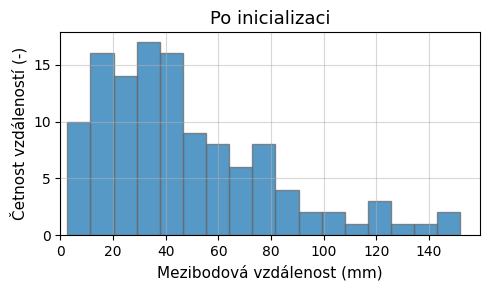

In [60]:
 """
 def plotErrorHist(error_values, reg_methods, hist_bins=(17, 17, 17), 
                  hist_type="initial", bin_color="#1f77b4", save=False):
    
    fig_hist, ax_hist = plt.subplots(1, error_values.shape[1], figsize=(12, 4))


    indexes = np.arange(0, error_values.shape[1])
    for ax, idx, method, color, hist_bin in zip(ax_hist.ravel(), indexes, reg_methods, colors, hist_bins):
        ax.hist(error_values[:, idx].ravel(), bins=hist_bin, alpha=0.75, color=color, 
                edgecolor="dimgray", linewidth=1.)
        ax.grid(alpha=0.5)
        # ax.set_yticks(np.arange(0, np.histogram(error_values[:, 1].ravel())[0][0] + 5, 5, dtype=int))
        #ax.set_xticks(np.arange(0, gradientErrors[:, 0].max() + 10, 20))
    #ax_hist.set_yticks(np.arange(0, np.histogram(gradientErrors[:, 2].ravel())[0][0], 10))
        ax.set_xlabel("Mezibodová vzdálenost (mm)", fontsize=11)
        ax.set_title(method, fontsize=11)
        ax.set_ylim([0, None])
        ax.set_xlim([0, None])
    ax_hist[0].set_ylabel("Četnost vzdáleností (-)", fontsize=13)
    # ax_hist.set_title("Rozložení míry nepřesností")
    # ax_hist.legend()
    fig_hist.tight_layout()
    plt.show()

    if save:
        fig_hist.savefig(f"input_files\\globalni_grafy\\{hist_type}Histogram.pdf", bbox_inches="tight")
"""
def plotErrorHist2(error_values, reg_phase, bin_width=17, 
                   hist_type="initial", bin_color="#1f77b4", save=False):
    
    fig_hist, ax_hist = plt.subplots(1, 1, figsize=(5, 3))


    ax_hist.hist(error_values, bins=bin_width, alpha=0.75, color=bin_color, 
                edgecolor="dimgray", linewidth=1.)
    ax_hist.grid(alpha=0.5)
    ax_hist.set_xlabel("Mezibodová vzdálenost (mm)", fontsize=11)
    ax_hist.set_title(reg_phase, fontsize=13)
    ax_hist.set_ylim([0, None])
    ax_hist.set_xlim([0, None])
    ax_hist.set_ylabel("Četnost vzdáleností (-)", fontsize=11)
    ax_hist.yaxis.set_major_locator(MaxNLocator(integer=True))
    ax_hist.set_xticks(np.arange(0, error_values.max() + 5, 20))
    ax_hist.set_yticks(np.arange(0, 20, 5))
    # ax_hist.set_title("Rozložení míry nepřesností")
    # ax_hist.legend()
    fig_hist.tight_layout()
    plt.show()

    if save:
        fig_hist.savefig(f"graficke_vystupy\\{hist_type}Histogram.svg", bbox_inches="tight")


regMethods = ["gradientní sestup", "gradientní sestup se zlatým řezem", "BFGS s omezenou pamětí"]

# plotErrorHist(initialErrors, ["Před inicializací", "Po inicializaci"], 
#                hist_bins=(16, 16), save=saveState)
# plotErrorHist(lastIterErrors, regMethods, hist_bins=(17, 18, 18), hist_type="initial", save=saveState)

plotErrorHist2(initialErrors[:, 1].ravel(), "Po inicializaci", bin_width=17, 
              hist_type="postInitial", bin_color=colors[0], save=False)

In [206]:
patientNumber = "09"
regMethodDir = "gradient"
regMethod = ""

if regMethodDir == "gradient":
    regMethod = "gradientní sestup"
elif regMethodDir == "gradientline":
    regMethod = "gradientní sestup se zl. řezem"
elif regMethodDir == "gradientlbf":
    regMethod = "BFGS s omezenou pamětí"

regDir = os.path.join(os.getcwd(), f"input_files\\pacient_{patientNumber}\\registration\\{regMethodDir}\\")

regInfoFile = np.load(os.path.join(regDir, f"pacient{patientNumber}registrationInfo{view.upper()}.npz"))
errorsInfoFile = np.load(os.path.join(regDir, f"pacient{patientNumber}ErrorsInfo{view.upper()}.npz"))
colors = list(mcolors.TABLEAU_COLORS.values())
regInfo = {key: regInfoFile[key] for key in regInfoFile.files}
errorsInfo = {key: errorsInfoFile[key] for key in errorsInfoFile.files} 

medianErrorValues = [np.load(f"input_files\\pacient_{patientNumber}\\registration\\gradient\\"
                        f"pacient{patientNumber}ErrorsInfo{view.upper()}.npz")["medianValues"],
                np.load(f"input_files\\pacient_{patientNumber}\\registration\\gradientline\\"
                        f"pacient{patientNumber}ErrorsInfo{view.upper()}.npz")["medianValues"],
                np.load(f"input_files\\pacient_{patientNumber}\\registration\\gradientlbf\\"
                        f"pacient{patientNumber}ErrorsInfo{view.upper()}.npz")["medianValues"]]

metricValues = [np.load(f"input_files\\pacient_{patientNumber}\\registration\\gradient\\"
                        f"pacient{patientNumber}registrationInfo{view.upper()}.npz")["metricValues"],
                np.load(f"input_files\\pacient_{patientNumber}\\registration\\gradientline\\"
                        f"pacient{patientNumber}registrationInfo{view.upper()}.npz")["metricValues"],
                np.load(f"input_files\\pacient_{patientNumber}\\registration\\gradientlbf\\"
                        f"pacient{patientNumber}registrationInfo{view.upper()}.npz")["metricValues"]]

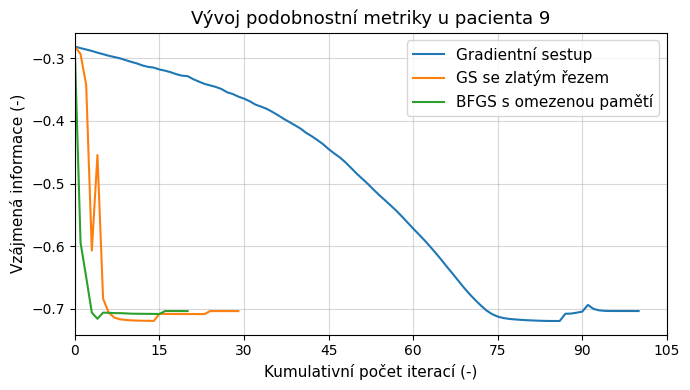

In [207]:
def plotAllMetrics(metric_values, pat_number, save=False):
    
    fig_metrics, ax_metrics = plt.subplots(1, 1, figsize=(7, 4))
    
    labels = ["Gradientní sestup", "GS se zlatým řezem", "BFGS s omezenou pamětí"]
    for values, label in zip(metric_values, labels):
        ax_metrics.plot(values, label=label)
    ax_metrics.legend(fontsize=11, loc="best")
    ax_metrics.grid(alpha=0.5)
    ax_metrics.set_xlabel("Kumulativní počet iterací (-)", fontsize=11)
    ax_metrics.set_ylabel("Vzájmená informace (-)", fontsize=11)
    ax_metrics.set_title(f"Vývoj podobnostní metriky u pacienta {int(pat_number)}", fontsize=13)
    
    ax_metrics.set_xticks(np.arange(0, len(metric_values[0]) + 10, 15))
    #ax_metrics.set_yticks(np.arange(-0.45, metric_values[0].min() - 0.05, -0.05))
    ax_metrics.set_xlim([0, None])
    fig_metrics.tight_layout()
    plt.show()
    
    if save:
        fig_metrics.savefig(f"graficke_vystupy\\pacient_{pat_number}\\pacient{pat_number}AllOptims.svg", 
                            bbox_inches="tight")


plotAllMetrics(metricValues, patientNumber, save=True)

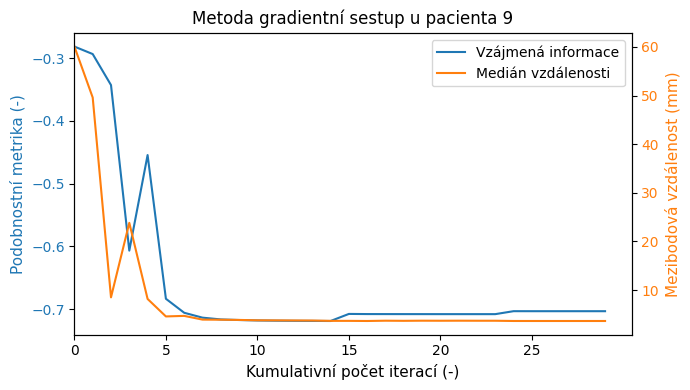

In [209]:
def plotMetricAndError(metric_values, median_errors, multires_iters, 
                       reg_method, pat_number, save=False):
    
    fig_metric_tre, ax_metric_tre = plt.subplots(1, 1, figsize=(7, 4))
    twin1 = ax_metric_tre.twinx()
    
    color1 = "tab:blue"
    color2 = "tab:orange"
    iters = np.arange(0, len(metric_values))
    plot1, = ax_metric_tre.plot(iters, metric_values, color=color1, label="Vzájmená informace")
    plot2, = twin1.plot(iters, median_errors, color=color2, label="Medián vzdálenosti", ls="-")
    
    ax_metric_tre.set_xlabel("Kumulativní počet iterací (-)", fontsize=11)
    ax_metric_tre.set_ylabel("Podobnostní metrika (-)", fontsize=11, color=color1)
    ax_metric_tre.tick_params(axis="y", labelcolor=color1)
    twin1.set_ylabel("Mezibodová vzdálenost (mm)", fontsize=11, color=color2)
    twin1.tick_params(axis="y", labelcolor=color2)
    ax_metric_tre.set_xticks(np.arange(0, iters.shape[0], 5))
    #ax_metric_tre.set_yticks(np.arange(-0.25, -0.66, -0.05))
    #twin1.set_yticks(np.arange(0, 30, 5))
    
    """
    ax_metric_tre.set_xlim([0, None])
    ax_metric_tre.set_ylim([None, None])
    ax_ylim = ax_metric_tre.get_ylim()
    for indx, multi_iter in enumerate(multires_iters):
        if multi_iter != multires_iters[-1]:
            ax_metric_tre.fill_between(iters[multi_iter:multires_iters[indx + 1] + 1],
                                       ax_ylim[0], # metric_values[multi_iter:multires_iters[indx + 1] + 1] - 0.05
                                       ax_ylim[1], # metric_values[multi_iter:multires_iters[indx + 1] + 1] + 0.05
                                       facecolor=colors[indx], alpha=0.6)
        else:
            ax_metric_tre.fill_between(iters[multi_iter:iters[-1] + 1],
                                       metric_values[multi_iter:iters[-1] + 1] - 0.05,
                                       metric_values[multi_iter:iters[-1] + 1] + 0.05,
                                       facecolor=colors[indx], alpha=0.6)
    
    ax_metric_tre.set_xlim([0, None])
    ax_metric_tre.set_ylim([None, None])
    ax_metric_tre.vlines(regInfo["multiresIters"], 
                         ax_metric_tre.get_ylim()[0], # metric_values[multires_iters] - 0.075 
                         ax_metric_tre.get_ylim()[1], # metric_values[multires_iters] + 0.075 
                         ls="dotted", lw=1.25, colors="black")
    
    levels = [level for level in range(len(multires_iters), 0, -1)]
    for level, multi_iter in zip(levels, multires_iters):
        ax_metric_tre.annotate(f"{level}.", (multi_iter + 1, metric_values[multi_iter] + 0.001)) 
    """
    
    ax_metric_tre.set_xlim([0, None])
    ax_metric_tre.set_ylim([None, None])
    ax_metric_tre.set_title(f"Metoda {reg_method} u pacienta {int(pat_number)}")
    ax_metric_tre.legend(handles=[plot1, plot2])
    
    fig_metric_tre.tight_layout()
    plt.show()
    
    if save:
        fig_metric_tre.savefig(f"graficke_vystupy\\pacient_{pat_number}\\pacient{pat_number}MetricAndError.pdf", 
                               bbox_inches="tight")


plotMetricAndError(metricValues[1], medianErrorValues[1], regInfo["multiresIters"], 
                   regMethod, patientNumber, save=True)

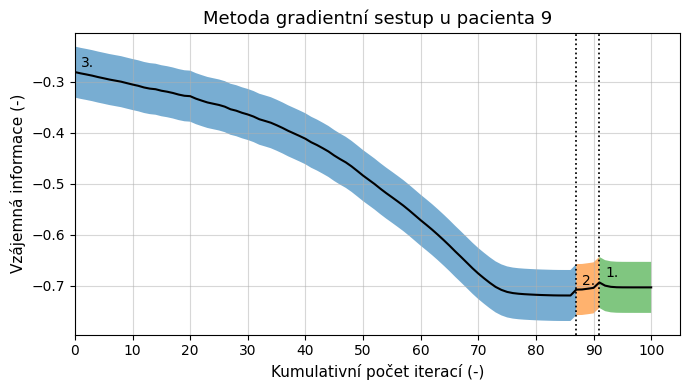

In [212]:
def plotMetricValues(metric_values, multires_iters, shrink_factors, smooth_sigmas,
                     pat_number, reg_method, save=False):
    iters = np.arange(0, len(metric_values))
    
    fig_metric, ax_metric = plt.subplots(1, 1, figsize=(7, 4))
    ax_metric.plot(iters, metric_values, label="Vzájemná informace", c="black")

    for indx, multi_iter in enumerate(multires_iters):
        if multi_iter != multires_iters[-1]:
            ax_metric.fill_between(iters[multi_iter:multires_iters[indx + 1] + 1],
                                   metric_values[multi_iter:multires_iters[indx + 1] + 1] - 0.05,
                                   metric_values[multi_iter:multires_iters[indx + 1] + 1] + 0.05,
                                   facecolor=colors[indx], alpha=0.6)
        else:
            ax_metric.fill_between(iters[multi_iter:iters[-1] + 1],
                                   metric_values[multi_iter:iters[-1] + 1] - 0.05,
                                   metric_values[multi_iter:iters[-1] + 1] + 0.05,
                                   facecolor=colors[indx], alpha=0.6)
     
    ax_metric.set_xticks(np.arange(0, len(metric_values), 20))
    # ax_metric.set_yticks(np.arange(-0.5, -0.75, -0.04))
            
    ax_metric.set_xlim([0, None])
    ax_metric.set_ylim([None, None])
    ax_ylim = ax_metric.get_ylim()
    ax_xlim = ax_metric.get_xlim()
    ax_metric.vlines(multires_iters, 
                     ax_ylim[0], # metric_values[multires_iters] - 0.075 
                     ax_ylim[1], # metric_values[multires_iters] + 0.075 
                     ls="dotted", lw=1.25, colors="black")
    
    levels = [level for level in range(len(multires_iters), 0, -1)]
    for level, multi_iter in zip(levels, multires_iters):
        ax_metric.annotate(f"{level}.", (multi_iter + 1,
                                         metric_values[multi_iter] + 0.01))
    # param_text = f"Parametry registračních úrovní:\n S = {shrink_factors}\n $\sigma^2$ = {smooth_sigmas}"
    # ax_metric.text(iters[4], -0.6, param_text, bbox=dict(edgecolor="k",
    #                                                      facecolor="none"))
    
    # ax_metric.set_xlim([0, None])
    # ax_metric.set_ylim([None, None])
        # ax_metric.annotate(f"{level}. S = {shrink}\n    $\sigma^2$ = {smooth}", 
        #                   (multi_iter + 2, ax_ylim[0] + 0.01))
    
    """
    # ax_ylim = ax_metric.get_ylim()
    # ax_metric.vlines(multires_iters, ax_ylim[0], ax_ylim[1], ls="--", colors="black")
            
    # 
    # ax_metric.fill_between(iters[multires_iters[0]:multires_iters[1] + 1], 
    #                     ax_ylim[0], 
    #                     metric_values[multires_iters[0]:multires_iters[1] + 1],
    #                  facecolor="red", alpha=0.5)
    # ax_metric.fill_between(iters[multires_iters[1]:multires_iters[2] + 1], 
    #                     ax_ylim[0], 
    #                     metric_values[multires_iters[1]:multires_iters[2] + 1],
    #                  facecolor="blue", alpha=0.5)
    # ax_metric.fill_between(iters[multires_iters[2]:iters[-1] + 1], 
    #                     ax_ylim[0], 
    #                     ax_ylim[1],
    #                  facecolor="green", alpha=0.5)
    """
    ax_metric.set_xlabel("Kumulativní počet iterací (-)", fontsize=11)
    ax_metric.set_ylabel("Vzájemná informace (-)", fontsize=11)
    ax_metric.set_title(f"Metoda {reg_method} u pacienta {int(pat_number)}", fontsize=13)
    ax_metric.set_xticks(np.arange(0, len(metric_values), 10))
    #ax_metric.set_yticks(np.arange(-0.35, -0.8, -0.05))
    ax_metric.grid(alpha=0.5)
    #ax_metric.legend()
    fig_metric.tight_layout()
    plt.show()
    
    if save:
        fig_metric.savefig(f"graficke_vystupy\\pacient_{pat_number}\\pacient{pat_number}BestMetric.pdf", 
                           bbox_inches="tight")


plotMetricValues(regInfo["metricValues"], regInfo["multiresIters"], 
                 regInfo["shrinkFactors"], regInfo["smoothingSigmas"], 
                 patientNumber, regMethod, save=True)

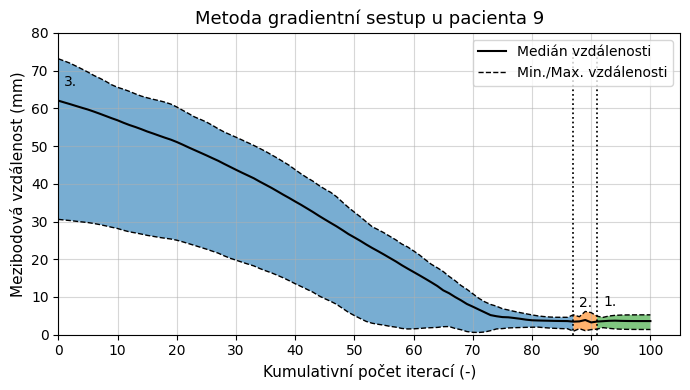

In [214]:
def plotRegistrationErrors(median_errors, min_errors, max_errors, 
                           metric_values, multires_iters, 
                           pat_number, reg_method, save=False):
    iters = np.arange(0, len(metric_values))
    # Plot the TRE median value and the [min-max] range.
    fig_tre, ax_tre = plt.subplots(1, 1, figsize=(7, 4))
    ax_tre.plot(iters, median_errors, color="black", label="Medián vzdálenosti")
    ax_tre.plot(iters, min_errors, c="black", ls="--", lw=1., label="Min./Max. vzdálenosti")
    ax_tre.plot(iters, max_errors, c="black", ls="--", lw=1.)
    
    for indx, multi_iter in enumerate(multires_iters):
        if multi_iter != multires_iters[-1]:
            ax_tre.fill_between(iters[multi_iter:multires_iters[indx + 1] + 1],
                                   min_errors[multi_iter:multires_iters[indx + 1] + 1],
                                   max_errors[multi_iter:multires_iters[indx + 1] + 1],
                                   facecolor=colors[indx], alpha=0.6)
        else:
            ax_tre.fill_between(iters[multi_iter:iters[-1] + 1],
                                   min_errors[multi_iter:iters[-1] + 1],
                                   max_errors[multi_iter:iters[-1] + 1],
                                   facecolor=colors[indx], alpha=0.6)
    ax_tre.set_xlim([0, None])
    ax_tre.set_ylim([0, None])
    ax_ylim = ax_tre.get_ylim()
    ax_tre.vlines(multires_iters, ax_ylim[0], ax_ylim[1], 
                  ls="dotted", lw=1.25, colors="black") # min_errors[multires_iters], max_errors[multires_iters], 

    levels = [level for level in range(len(multires_iters), 0, -1)]
    for level, multi_iter in zip(levels, multires_iters):
        ax_tre.annotate(f"{level}.", (multi_iter + 1, median_errors[multi_iter] + 4))

    ax_tre.set_xlabel("Kumulativní počet iterací (-)", fontsize=11)
    ax_tre.set_ylabel("Mezibodová vzdálenost (mm)", fontsize=11)
    ax_tre.set_title(f"Metoda {reg_method} u pacienta {int(pat_number)}", fontsize=13)
    ax_tre.set_xticks(np.arange(0, len(metric_values), 10))
    ax_tre.set_yticks(np.arange(0, max_errors.max() + 10, 10))
    # ax_tre.set_xlim([0, None])
    # ax_tre.set_ylim([0, None])
    ax_tre.grid(alpha=0.5)
    ax_tre.legend()
    fig_tre.tight_layout()
    
    plt.show()
    
    if save:
        fig_tre.savefig(f"graficke_vystupy\\pacient_{pat_number}\\pacient{pat_number}BestTre.svg", bbox_inches="tight")


plotRegistrationErrors(errorsInfo["medianValues"], errorsInfo["minValues"], 
                       errorsInfo["maxValues"], regInfo["metricValues"], 
                       regInfo["multiresIters"], patientNumber, regMethod, save=True)

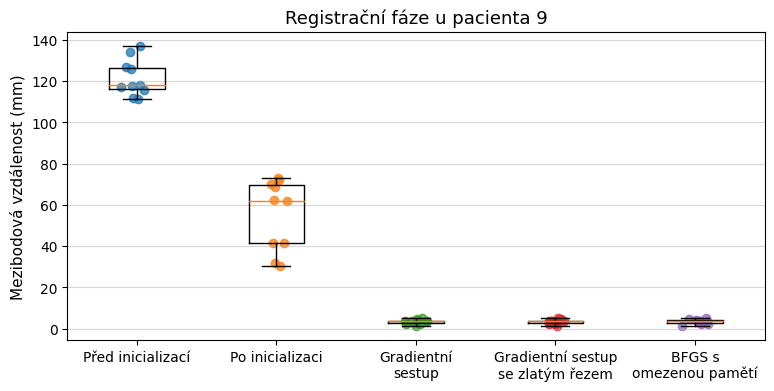

In [74]:
def plotPatientErrorBox(patient_errors, reg_stages, pat_number, save=False):
    fig_box, ax_box = plt.subplots(1, 1, figsize=(9, 4))

    ax_box.boxplot(patient_errors, labels=reg_stages, widths=0.4, showfliers=False)
    scatter_xaxis = []
    for indx, col in enumerate(range(patient_errors.shape[1])):
        scatter_xaxis.append(np.random.normal(indx + 1, 0.05, size=patient_errors.shape[0]))
    
    for xaxis, values, color in zip(scatter_xaxis, patient_errors.T, palette):
        ax_box.scatter(xaxis, values, c=color, alpha=0.75)

    ax_box.yaxis.grid(True, alpha=0.5)
    ax_box.set_title(f"Registrační fáze u pacienta {int(pat_number)}", fontsize=13)
    ax_box.set_ylabel("Vzdálenost mezi páry bodů (mm)", fontsize=11)
    ax_box.set_ylabel("Mezibodová vzdálenost (mm)", fontsize=11)
    # ax_box.set_yticks(np.arange(0, 91, 15))
    plt.show()

    if save:
        fig_box.savefig(f"graficke_vystupy\\pacient_{pat_number}\\pacient{pat_number}RegPhases.pdf", 
                        bbox_inches="tight")
        

palette = colors[:5]
patientErrors = np.array([initialErrors[int(patientNumber) - 1, 0, :],
                          initialErrors[int(patientNumber) - 1, 1, :],
                          lastIterErrors[int(patientNumber) - 1, 0, :],
                          lastIterErrors[int(patientNumber) - 1, 1, :],
                          lastIterErrors[int(patientNumber) - 1, 2, :]]).T
plotPatientErrorBox(patientErrors, regStages, patientNumber, save=False)

# allLastPatientErrors = np.array([initialErrors[:, 0, :].ravel(),
#                                  initialErrors[:, 1, :].ravel(),
#                                  lastIterErrors[:, 0, :].ravel(),
#                                  lastIterErrors[:, 1, :].ravel(),
#                                  lastIterErrors[:, 2, :].ravel()]).T
# plotPatientErrorBox(allLastPatientErrors, regStages, patientNumber, save=saveState)


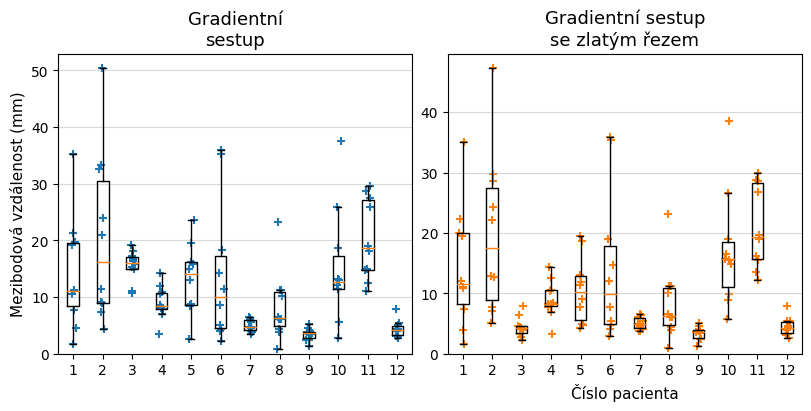

In [46]:
def plotAllBoxplotErrors(error_values, pat_numbers, reg_stage,
                         reg_save_stage, save=False):
    fig_box, (ax_box1, ax_box2) = plt.subplots(1, 3, figsize=(8, 4), layout="constrained")

    pre_initial_error = error_values[:, 0, :]
    post_initial_error = error_values[:, 1, :]


    ax_box1.boxplot(pre_initial_error, widths=0.4, showfliers=False)
    ax_box2.boxplot(post_initial_error, widths=0.4, showfliers=False)
    scatter_xaxis1 = []
    scatter_xaxis2 = []
    for indx, col in enumerate(range(pre_initial_error.shape[1])):
        scatter_xaxis1.append(np.random.normal(indx + 1, 0.05, size=pre_initial_error.shape[0]))
        scatter_xaxis2.append(np.random.normal(indx + 1, 0.05, size=post_initial_error.shape[0]))
    
    for xaxis, values in zip(scatter_xaxis1, pre_initial_error.T):
        ax_box1.scatter(xaxis, values, c=colors[0], marker="+", s=30)

    for xaxis, values in zip(scatter_xaxis2, post_initial_error.T):
        ax_box2.scatter(xaxis, values, c=colors[1], marker="+", s=30)

    ax_box1.yaxis.grid(True, alpha=0.5)
    ax_box2.yaxis.grid(True, alpha=0.5)
    ax_box1.set_title(f"{reg_stage[0]}", fontsize=13)
    ax_box2.set_title(f"{reg_stage[1]}", fontsize=13)
    ax_box1.set_ylabel("Mezibodová vzdálenost (mm)", fontsize=11)
    # ax_box1.set_xlabel("Číslo pacienta", fontsize=11)
    ax_box2.set_xlabel("Číslo pacienta", fontsize=11)

    ax_box1.set_ylim([0, None])
    ax_box2.set_ylim([0, None])

    # ax_box.set_yticks(np.arange(0, 91, 15))
    plt.show()

    if save:
        fig_box.savefig(f"graficke_vystupy\\preAndPostInitialAllErrorsBoxplot.pdf", 
                        bbox_inches="tight")
        fig_box.savefig(f"graficke_vystupy\\preAndPostInitialAllErrorsBoxplot.svg", 
                bbox_inches="tight")
        
plotAllBoxplotErrors(lastIterErrors.T, patNumbers, regStages[2:], "preInitial", save=False)


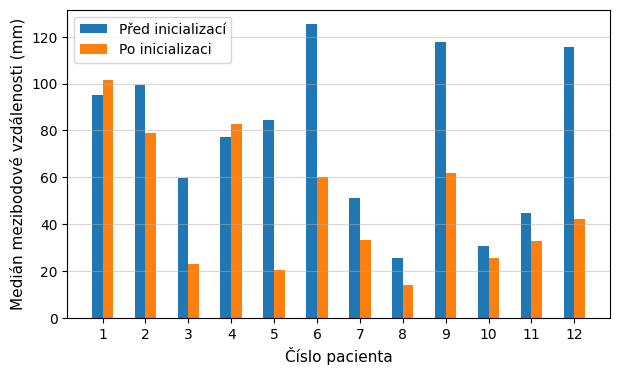

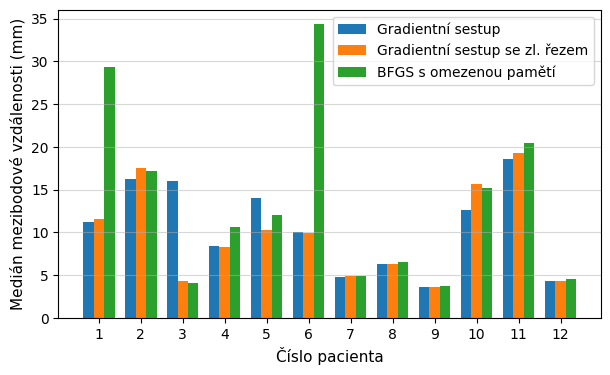

In [221]:
def plotMedianErrorBars(median_errors, labels, reg_stage, save=False):

    median_error_groups = {key:val for (key, val) in zip(labels, np.transpose(median_errors))}

    bar_numbers = np.arange(1, median_errors.shape[0] + 1)
    width = 0.25
    multiplier = 0

    fig_bar, ax_bar = plt.subplots(1, 1, figsize=(7, 4))

    for group, median_error in median_error_groups.items():
        offset = width * multiplier
        ax_bar.bar(bar_numbers + offset, median_error, width, label=group)
        multiplier += 1

    if median_errors.shape[-1] == 2:
        ax_bar.set_xticks(bar_numbers + (width / 2), bar_numbers)
    else:
        ax_bar.set_xticks(bar_numbers + width, bar_numbers)

    # ax_bar.hlines(np.mean(median_errors.ravel()), xmin=0, xmax=20, 
    #               color="k", ls="--", lw=1.0)

    ax_bar.set_xlabel("Číslo pacienta", fontsize=11)
    ax_bar.set_ylabel("Medián mezibodové vzdálenosti (mm)", fontsize=11)
    #ax_bar.set_xlim([0.25, None])
    #ax_bar.set_ylim([0, 50])
    ax_bar.yaxis.grid(alpha=0.5)

    ax_bar.legend(ncols=1)

    plt.show()

    if save:
        fig_bar.savefig(f"graficke_vystupy\\{reg_stage}PatientErrorsBars.pdf", 
                        bbox_inches="tight")
        fig_bar.savefig(f"graficke_vystupy\\{reg_stage}PatientErrorsBars.svg", 
                bbox_inches="tight")
    

plotMedianErrorBars(initialLastmedianErrors[:, :2], regLabels[:2], "preReg", save=True)
plotMedianErrorBars(initialLastmedianErrors[:, 2:], regLabels[2:], "postReg", save=True)

In [214]:
pat1RunTimeRegLevel = np.array([[113.646, 137.341, 19.699, 17.13, 7.011],  # rows = reg methods, cols = reg levels
                                [24.181, 28.921, 16.406, 15.21, 14.496],
                                [12.825, 13.666, 11.981, 18.69, 10.930]])

pat1MedianErrorRegLevel = np.array([[87.501, 35.787, 11.911, 11.149, 22.992],
                                    [23.181, 12.137, 11.700, 11.580, 11.540],
                                    [51.540, 38.676, 44.328, 20.13, 12.603]])

regLevels = [1, 2, 3, 4, 5]

regLevelShrinkConsts = {"2", (2, 1),
                        "3", (4, 2, 1),
                        "4", (6, 4, 2, 1),
                        "5", (8, 6, 4, 2, 1)}

regLevelSigmaConsts = {"2", (1, 0),
                       "3", (2, 1, 0),
                       "4", (3, 2, 1, 0),
                       "5", (4, 3, 2, 1, 0)}

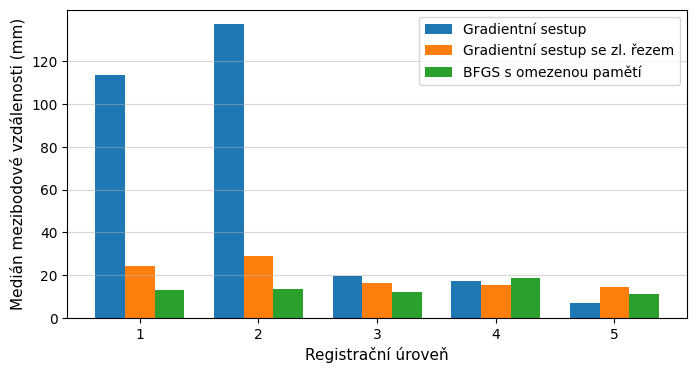

In [229]:
def plotValuesPerLevel(values, labels, reg_stage, save=False):

    median_error_groups = {key:val for (key, val) in zip(labels, np.transpose(values))}

    bar_numbers = np.arange(1, values.shape[0] + 1)
    width = 0.25
    multiplier = 0

    fig_bar, ax_bar = plt.subplots(1, 1, figsize=(8, 4))

    for group, median_error in median_error_groups.items():
        offset = width * multiplier
        ax_bar.bar(bar_numbers + offset, median_error, width, label=group)
        multiplier += 1

    ax_bar.set_xticks(bar_numbers + width, bar_numbers)

    # ax_bar.hlines(np.mean(median_errors.ravel()), xmin=0, xmax=20, 
    #               color="k", ls="--", lw=1.0)

    ax_bar.set_xlabel("Registrační úroveň", fontsize=11)
    ax_bar.set_ylabel("Medián mezibodové vzdálenosti (mm)", fontsize=11)
    ax_bar.set_yticks(np.arange(0, values.max(), 20))
    #ax_bar.set_xlim([None, None])
    #ax_bar.set_ylim([0, 50])
    ax_bar.yaxis.grid(alpha=0.5)

    ax_bar.legend(ncols=1)

    plt.show()

    if save:
        fig_bar.savefig(f"graficke_vystupy\\{reg_stage}Bars.pdf", 
                        bbox_inches="tight")
        fig_bar.savefig(f"graficke_vystupy\\{reg_stage}Bars.svg", 
                bbox_inches="tight")
    

plotValuesPerLevel(pat1RunTimeRegLevel.T, regLabels[2:], "pat1RunTime", save=True)

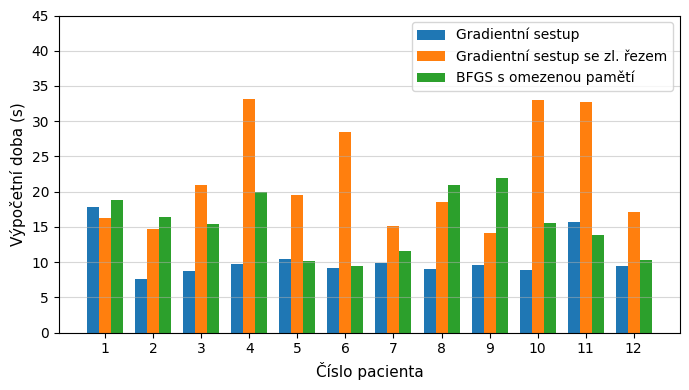

In [218]:
# runtime_groups = {"Gradientní sestup": runTime[:, 0],
#                   "Gradientní sestup se zl. řezem": runTime[:, 1],
#                   "BFGS s omezenou pamětí": runTime[:, 2]}

# runTimeMedianGroups = {key:np.mean(val) for (key, val) in zip(regLabels[2:], runTime.T)}
# runTimeMeanGroups = {key:[np.mean(val), np.mean(val)] for (key, val) in zip(regLabels[2:], runTime.T)}

runTimeGroups = {key:val for (key, val) in zip(regLabels[2:], runTime.T)}

x = np.arange(1, 12 + 1, dtype=int)
width = 0.25
multipler = 0

# fig2, ax2 = plt.subplots()
# 
fig_all_runtimes, ax_all_runtimes = plt.subplots(1, 1, figsize=(7, 4))

for group, run_time in runTimeGroups.items():
    offset = width * multipler
    rects = ax_all_runtimes.bar(x + offset, run_time, width, label=group)
    multipler += 1

ax_all_runtimes.set_xticks(np.arange(1, len(patNumbers) + 1) + width, np.arange(1, len(patNumbers) + 1))
ax_all_runtimes.set_yticks(np.arange(0, 50, 5))
ax_all_runtimes.set_xlabel("Číslo pacienta", fontsize=11)
ax_all_runtimes.set_ylabel("Výpočetní doba (s)", fontsize=11)
ax_all_runtimes.set_ylim([0, 45])
ax_all_runtimes.yaxis.grid(alpha=0.5)
ax_all_runtimes.legend()

fig_all_runtimes.tight_layout()

fig_all_runtimes.savefig("graficke_vystupy\\runTimeAllPatients.svg", bbox_inches="tight")

plt.show()

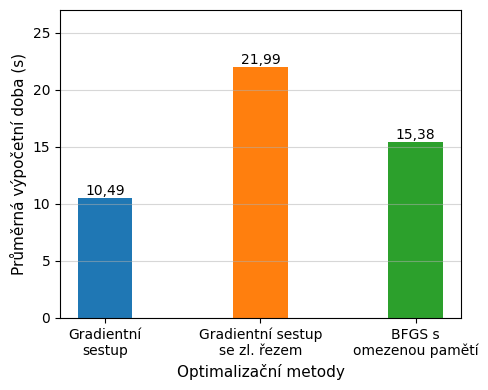

In [219]:
runTimeMeans = np.mean(runTime, axis=0)

bar_labels = [f"{val:,.2f}".replace(".", ",") for val in runTimeMeans]

fig_runtime_bar, ax_runtime_bar = plt.subplots(1, 1, figsize=(5, 4))

rects = ax_runtime_bar.bar(np.arange(len(runTimeMeans)), runTimeMeans, width=0.35, color=colors[:3])
ax_runtime_bar.bar_label(rects, labels=bar_labels)
ax_runtime_bar.set_xticks(np.arange(len(runTimeMeans), dtype=int), regStages[2:])
ax_runtime_bar.set_xlabel("Optimalizační metody", fontsize=11)
ax_runtime_bar.set_ylabel("Průměrná výpočetní doba (s)", fontsize=11)
ax_runtime_bar.yaxis.grid(True, alpha=0.5)
ax_runtime_bar.set_ylim([0, rects.datavalues.max() + 5])

fig_runtime_bar.tight_layout()

fig_runtime_bar.savefig("graficke_vystupy\\runTimeAllOptims.svg", bbox_inches="tight")

plt.show()